In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import numpy as np
import pandas as pd
import nltk
import csv
import re

In [2]:
df = pd.read_csv('lipstick.csv')

In [3]:
df[50:58]

,Unnamed: 0,product_name,brand_name,price,love_count,color,rgb,link
50,50,Matte Revolution Lipstick,CHARLOTTE TILBURY,34.0,55206,Glastonberry muted purple berry,"(145, 76, 121)",https://www.sephora.com/product/matte-revoluti...
51,51,Matte Revolution Lipstick,CHARLOTTE TILBURY,34.0,55206,Love Liberty berry pink,"(163, 33, 97)",https://www.sephora.com/product/matte-revoluti...
52,52,Gloss Bomb Universal Lip Luminizer,FENTY BEAUTY BY RIHANNA,18.0,256222,Diamond Milk shimmering pearl,"(223, 204, 197)",https://www.sephora.com/product/gloss-bomb-uni...
53,53,Gloss Bomb Universal Lip Luminizer,FENTY BEAUTY BY RIHANNA,18.0,256222,Fenty Glow shimmering rose nude,"(181, 105, 91)",https://www.sephora.com/product/gloss-bomb-uni...
54,54,Velvet Matte Lipstick Pencil,NARS,27.0,309898,Get Off pink beige,"(243, 160, 146)",https://www.sephora.com/product/velvet-matte-l...
55,55,Velvet Matte Lipstick Pencil,NARS,27.0,309898,Intriguing rose pink,"(241, 139, 150)",https://www.sephora.com/product/velvet-matte-l...
56,56,Velvet Matte Lipstick Pencil,NARS,27.0,309898,Roman Holiday vibrant pink sheen,"(252, 159, 180)",https://www.sephora.com/product/velvet-matte-l...
57,57,Velvet Matte Lipstick Pencil,NARS,27.0,309898,Out of stock: Do Me Baby chestnut rose,"(217, 129, 151)",https://www.sephora.com/product/velvet-matte-l...


In [4]:
# df = df[ ~ df['product_name'].str.contains('Set') ]
invalid_info = df[df['price'].isna()]['price'].values
df = df[-df['price'].isin(invalid_info)]
invalid_info = df[df['love_count'].isna()]['love_count'].values
df = df[-df['love_count'].isin(invalid_info)]
df = df[ ~ df['product_name'].str.contains('Set') ]
df = df.reset_index(drop=True)

In [5]:
df.head()

,Unnamed: 0,product_name,brand_name,price,love_count,color,rgb,link
0,0,Lip Maestro,GIORGIO ARMANI BEAUTY,38.0,103038,Out of stock: 405,"(141, 6, 2)",https://www.sephora.com/product/lip-maestro-P3...
1,1,Lip Maestro,GIORGIO ARMANI BEAUTY,38.0,103038,507,"(144, 75, 94)",https://www.sephora.com/product/lip-maestro-P3...
2,2,Lip Maestro,GIORGIO ARMANI BEAUTY,38.0,103038,406,"(137, 38, 33)",https://www.sephora.com/product/lip-maestro-P3...
3,3,Lip Maestro,GIORGIO ARMANI BEAUTY,38.0,103038,508,"(245, 161, 151)",https://www.sephora.com/product/lip-maestro-P3...
4,4,Lip Maestro,GIORGIO ARMANI BEAUTY,38.0,103038,Out of stock: 400,"(163, 25, 23)",https://www.sephora.com/product/lip-maestro-P3...


In [6]:
df = df.sort_values(by='love_count', ascending=False)
df = df.reset_index(drop=True)
df = df.fillna(value=str(0))

In [74]:
# df['slicing'] = [len(i) for i in df['brand_name']]

In [75]:
# df['product_name'] = [df['product_name'].iloc[i][int(df['slicing'].iloc[i]):] for i in range(len(df['product_name']))]

In [7]:
pattern_ = r'^\w{3} \w{2} \w{5}: '
def remove_nostock(row):
    match = re.search(pattern_, row)
    if match:
        row = row[14:]
    return row

df['color'] = df['color'].apply(remove_nostock)

In [8]:
df

,Unnamed: 0,product_name,brand_name,price,love_count,color,rgb,link
0,107,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Muñeca nude petal,"(228, 108, 110)",https://www.sephora.com/product/everlasting-lo...
1,125,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Santa Sangre poison apple,"(208, 58, 59)",https://www.sephora.com/product/everlasting-lo...
2,115,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Hawkwind nude sienna,"(157, 64, 74)",https://www.sephora.com/product/everlasting-lo...
3,116,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Sanctuary nude coffee,"(142, 79, 87)",https://www.sephora.com/product/everlasting-lo...
4,117,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Crucifix deep chocolate,"(114, 66, 64)",https://www.sephora.com/product/everlasting-lo...
5,118,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Mother dusty mauve pink,"(181, 68, 88)",https://www.sephora.com/product/everlasting-lo...
6,119,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Berlin warm rose,"(216, 63, 83)",https://www.sephora.com/product/everlasting-lo...
7,120,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Ludwig nude fawn,"(175, 97, 95)",https://www.sephora.com/product/everlasting-lo...
8,121,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Double Dare cocoa blush,"(177, 62, 65)",https://www.sephora.com/product/everlasting-lo...
9,122,Everlasting Liquid Lipstick,KAT VON D,20.0,1148262,Armageddon carnation pink,"(249, 102, 170)",https://www.sephora.com/product/everlasting-lo...


In [9]:
def popular_lipstick(df):
    popular_lipstick = list()
    df_popular = df.groupby(['product_name','brand_name','love_count']).count().sort_values(by='love_count', ascending=False)
    df_popular.reset_index(inplace=True)
    for i in range(5):
        popular_lipstick.append((df_popular['product_name'].iloc[i], df_popular['brand_name'].iloc[i], df_popular['price'].iloc[i]))
    return popular_lipstick
popular_lipstick = popular_lipstick(df)
print( 'The top 5 loved lipsticks are:') 
popular_lipstick

The top 5 loved lipsticks are:


[('Everlasting Liquid Lipstick', 'KAT VON D', 32),
 ('Liquid Lipstick', 'ANASTASIA BEVERLY HILLS', 32),
 ('Cream Lip Stain Liquid Lipstick', 'SEPHORA COLLECTION', 12),
 ('Vice Lipstick', 'URBAN DECAY', 3),
 ('Full-On™ Plumping Lip Polish Gloss', 'BUXOM', 10)]

<h1> Get price for specific product

In [ ]:
# give a specific product info, return back the price
def get_price(brand, product, color):
    x = df.index[np.where((df['product_name'] == product ) & (df['brand_name'] == brand) & (df["color"] == color))][0]
    return df.loc[x]['price']

In [ ]:
# brand = 'NARS'
# product = 'Audacious Lipstick'
# color = 'Liv deep aubergine'
# get_price(brand, product, color)

<h1> Group the Product by Price

Divided 3 groups of 'Cheap', 'Normal' and 'Expensive'
#gotta have 3 groups: one is cheaper: <$15.47 (1 std  from mean); Normal: $15.47-$40 (1 std  from mean) and expensive: >$40

AxesSubplot(0.125,0.125;0.775x0.755)


/Users/wangzheng/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


count    3559.000000
mean       27.703006
std        12.231013
min         6.000000
25%        20.000000
50%        25.000000
75%        34.000000
max       139.000000
Name: price, dtype: float64

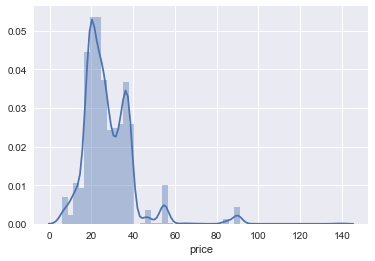

In [10]:
print(sns.distplot(df['price']))
#we can see the price range is to 140, which means a big gap between different lipstick, gotta group the price of lipstick to help customer to fit their consumption behavious
df['price'].describe() # the mean is 27.70, and the std is 12.23 which is kind of large
#gotta have 3 groups: one is cheaper: <$15.47(1 std from mean); Normal: $15.47-$40(1 std from mean) and expensive: >$40

In [11]:
#gotta have 3 groups: one is cheaper: <$15.47(1 std from mean); Normal: $15.47-$40(1 std from mean) and expensive: >$40
df["group"] = np.where(df["price"] <= 15.47, 'C', np.where((df['price']  > 15.47) & (df['price'] <=40) , 'N', 'E'))

<h1>Group the Brand with Price

In [12]:
price = df.groupby("brand_name").mean()

In [13]:
price = price.sort_values(by=['price'],ascending=[1])
#sort the price
price

,Unnamed: 0,price,love_count
brand_name,,,
ROSEBUD PERFUME CO.,2428.500000,7.500000,3.643725e+04
JACK BLACK,837.000000,7.500000,6.539800e+04
IT'S SKIN,3591.500000,10.000000,1.195800e+04
SEPHORA COLLECTION,1545.385475,10.899441,1.129586e+05
INC.REDIBLE,3572.250000,11.875000,1.030400e+04
KOPARI,1878.000000,12.000000,2.492600e+04
WINKY LUX,2767.500000,16.000000,2.862000e+03
KAJA,2643.000000,16.250000,6.888875e+03
JOUER COSMETICS,2294.375000,17.291667,2.235712e+04


In [14]:
price = price.drop(price.columns[[0,2]], axis = 1)
#only have price info for this price dataframe

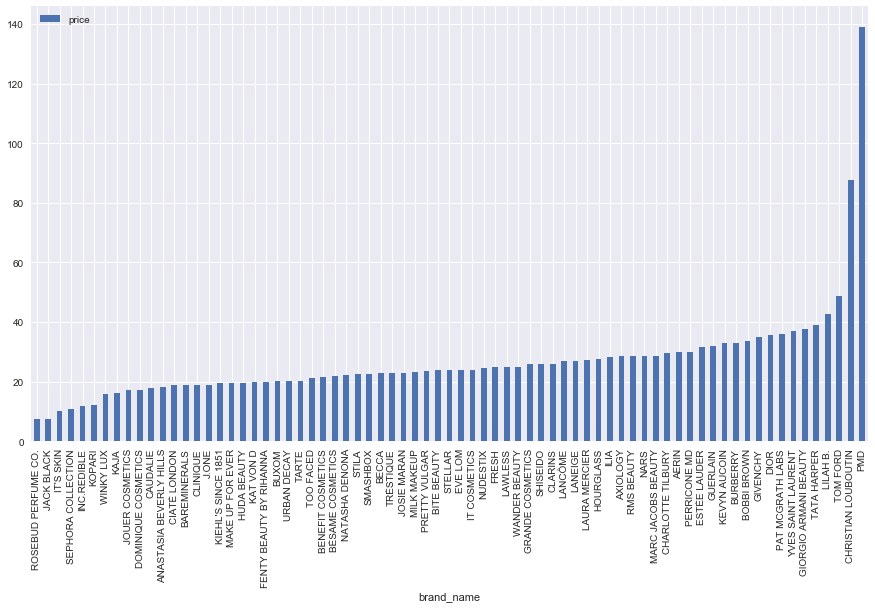

In [15]:
his = price.plot(kind='bar', figsize=(15,8))
# show the averge price of different brand to give the custome a general idea for price of a brand


In [16]:
price["price_group"] = np.where(price["price"] <= 15.47, 'Cheap', np.where((price['price']  > 15.47) & (price['price'] <=40) , 'Normal', 'Expensive'))

price_group
Cheap        AxesSubplot(0.125,0.125;0.775x0.755)
Expensive    AxesSubplot(0.125,0.125;0.775x0.755)
Normal       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

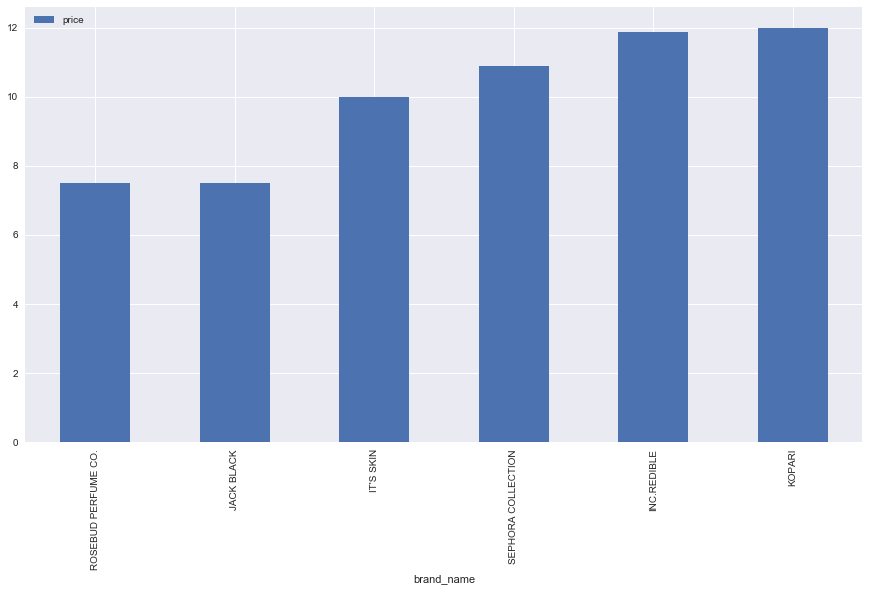

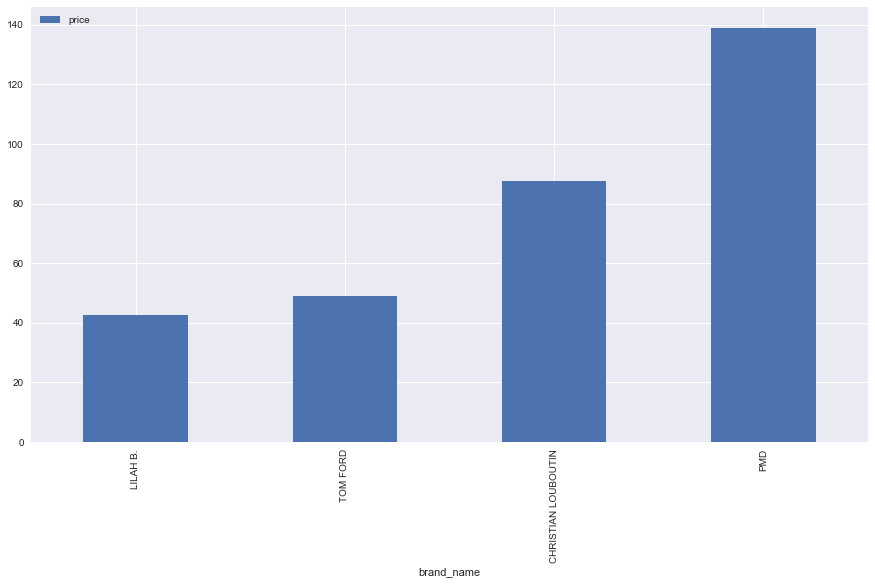

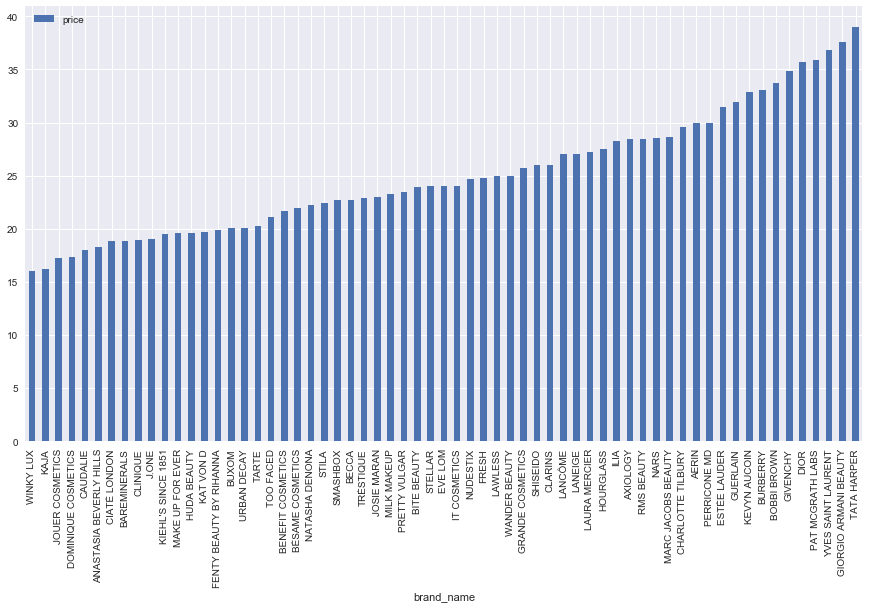

In [17]:
k= price.groupby('price_group')
k.plot(kind='bar', figsize=(15,8))
#show the graph of different price group

In [18]:
print('Cheap')
print(price[price['price_group'] == 'Cheap'])
print()
print('Normal')
print(price[price['price_group'] == 'Normal'])
print()
print('Expensive')
print(price[price['price_group'] == 'Expensive'])


Cheap
                         price price_group
brand_name                                
ROSEBUD PERFUME CO.   7.500000       Cheap
JACK BLACK            7.500000       Cheap
IT'S SKIN            10.000000       Cheap
SEPHORA COLLECTION   10.899441       Cheap
INC.REDIBLE          11.875000       Cheap
KOPARI               12.000000       Cheap

Normal
                             price price_group
brand_name                                    
WINKY LUX                16.000000      Normal
KAJA                     16.250000      Normal
JOUER COSMETICS          17.291667      Normal
DOMINIQUE COSMETICS      17.333333      Normal
CAUDALIE                 18.000000      Normal
ANASTASIA BEVERLY HILLS  18.247191      Normal
CIATÉ LONDON             18.868852      Normal
BAREMINERALS             18.895522      Normal
CLINIQUE                 18.929907      Normal
J.ONE                    19.000000      Normal
KIEHL'S SINCE 1851       19.500000      Normal
MAKE UP FOR EVER         19.613

<h1>The Price Level of different category of lipstick

#Lipstick
#Lip glaze
#Lip Dye
#Lip gloss
#Lip Liner
#Air cushion lip gloss
#Balm Rouge


In [19]:
df = df.reset_index(drop=True)
def lipproduct_group(row):
    if 'Glaze' in row:
        return 'Lip Glaze'
    if 'Lipstick' in row:
        return 'Lipstick'
    if 'Gloss'  in row:
        return 'Gloss'
    if 'gloss' in row:
        return 'Gloss'
    if 'Liner' in row:
        return 'Liner'
    if 'Balm' in row:
        return 'Balm'
    if 'Crayon' in row:
        return 'Pencil'
    if 'Pencil' in row:
        return 'Pencil'
    if 'Glow' in row:
        return 'Glow'
        
    else:
        return 'Others'
# def GroupColFunc(df, ind, col):
#     if df[col].loc[ind] == "Lip Glaze": 
#         return '"Lip Glaze"'   # the label for the group
#     else:
#         return 'Positive'

In [20]:
df['Category'] = df['product_name'].apply(lipproduct_group)
# df[df['Category'] == 'Others']

In [21]:
k = df[df['Category'] == 'Others']
k['product_name'].unique()


array(['Sugar Lip Treatment Sunscreen SPF 15', '#LIPSTORIES',
       'Stunna Lip Paint Longwear Fluid Lip Color',
       'Tarteist™ Creamy Matte Lip Paint',
       'Tarteist™ Quick Dry Matte Lip Paint', 'Agave Lip Mask',
       'Liquid Matte Minis', 'Ultra Shine Lip Gel',
       'Powermatte Lip Pigment',
       'Tatouage Couture Liquid Matte Lip Stain', 'Multistick',
       'Lip Maestro', 'The Multiple', 'Vinyl Cream Lip Stain',
       'Velvet Lip Glide', 'Lip Strobe',
       'Sugar Advanced Therapy Lip Treatment', 'Glitter Flip',
       'Boys & Girls Lip Color', 'Rosebud Salve',
       'Be Legendary Liquid Lip',
       'Vice Special Effects Long-Lasting Water-Resistant Lip Topcoat',
       'GIRL Lip Stylo', 'Liquid Lip Velvet', 'Cava Lip Collection',
       'Melted Chocolate', 'Ecstasy Lacquer', 'Lip Injection',
       'Dior Addict Lacquer Plump', 'Rosebud Salve in a Tube',
       'Lip + Cheek', 'Dior Addict Lacquer Stick',
       'Instant Light Lip Comfort Oil', 'Le Marc Liquid Lip C

In [22]:
Cat_ = df.groupby(df['Category'])

In [23]:
Cat_ = Cat_['price'].mean().sort_values(axis=0,ascending=False)
Cat_
# we can get that the liner is somehow the cheapest product

Category
Glow         34.000000
Others       32.256993
Lipstick     27.508032
Gloss        23.582840
Balm         23.321429
Lip Glaze    23.000000
Pencil       22.481328
Liner        19.092896
Name: price, dtype: float64

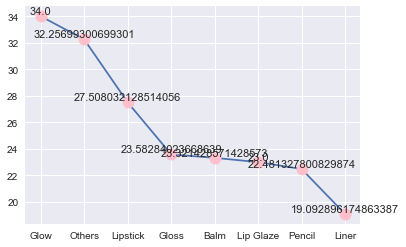

In [24]:
x1=[x for x in Cat_.index]
y = [y for y in Cat_]
plt.plot(x1, y, data=y, markerfacecolor='pink', marker='o', markersize = 12)
# Cat_.plot(x1,y,marker='o', markerfacecolor='blue',  markersize = 12, figsize=(15,8))
for a, b in zip(x1, y):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=11)